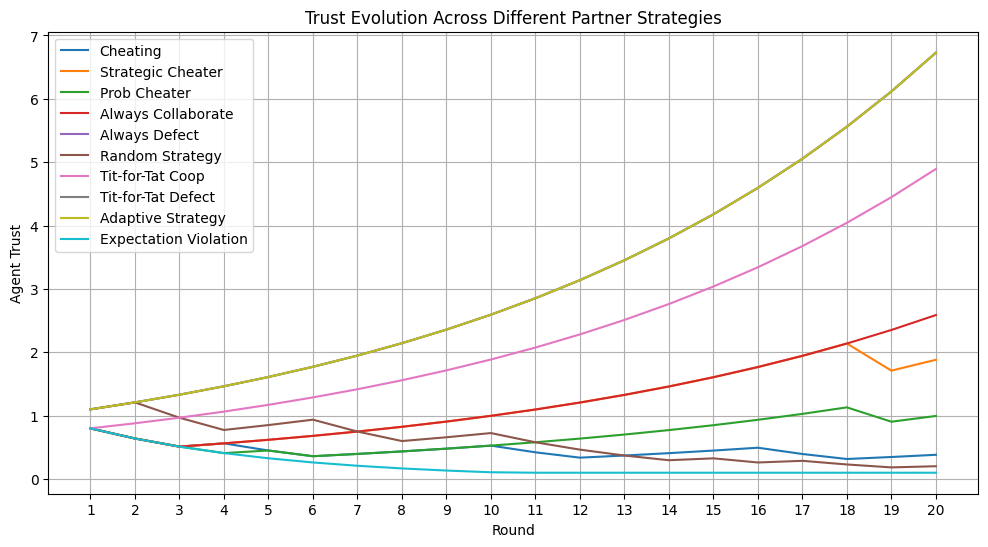

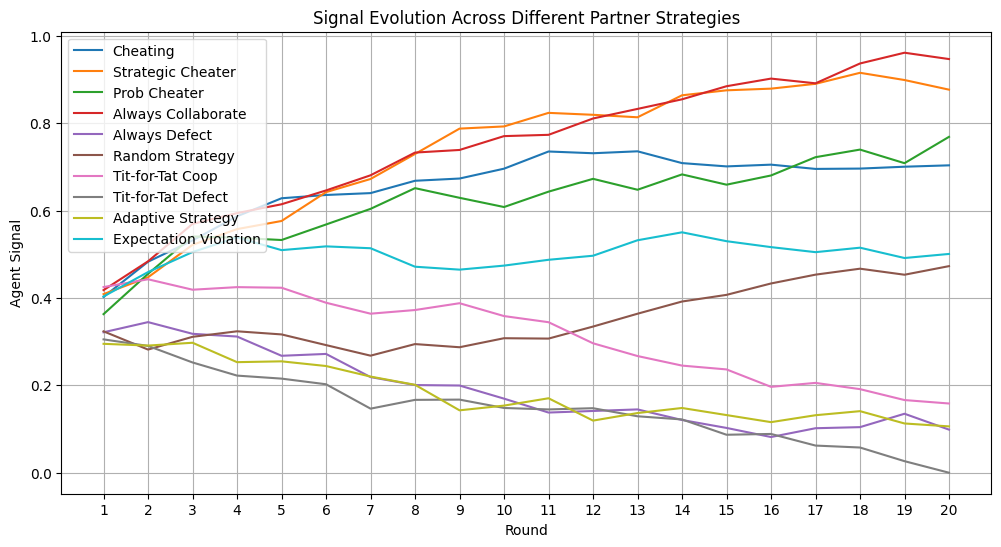

Agent Trust in Round 3 (Always Collaborate): 0.5120000000000001


In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

payoff = np.array([
    [[2, 2], [3, 0]], 
    [[0, 3], [4, 4]]
])

def get_payoff(player1_strategy, player2_strategy, player_id):
    return payoff[player1_strategy, player2_strategy][player_id]

class StagHuntAgent:
    def __init__(self, u_i=None, t_init=1.0, gamma_inc=1.1, gamma_dec=0.8, eta=0.1, noise_sigma=0.02):
        self.x = u_i if u_i is not None else 1 - ((get_payoff(0,0,0) - get_payoff(1,0,0)) / ((get_payoff(0,0,0) - get_payoff (1,0,0)) + (get_payoff(1,1,0) - get_payoff(0,1,0))))
        self.t = t_init  
        self.gamma_inc = gamma_inc
        self.gamma_dec = gamma_dec
        self.eta = eta  
        self.noise_sigma = noise_sigma  
    
    def expected_p(self):
        return (1 + self.x * self.t) / (2 + self.t)
    
    def make_decision(self):
        p = self.expected_p()
        E_V_hare = get_payoff(0, 0, 0) + p
        E_V_stag = get_payoff(1, 1, 0) * p
        D = E_V_stag - E_V_hare  
        return 1 if D > 0 else 0  
    
    def compute_new_trust(self, partner_choice):
        expected_choice = 1 if self.x > 0.5 else 0  
        new_trust = self.t * (self.gamma_inc if partner_choice == expected_choice else self.gamma_dec)
        return max(new_trust, 0.1)
    
    def compute_new_signal(self, P_obs):
        noise = np.random.normal(0, self.noise_sigma)  
        return np.clip(self.x + self.eta * (P_obs - self.x) + noise, 0, 1)
    
    def update_state(self, new_trust, new_signal):
        self.t = new_trust
        self.x = new_signal

def always_collaborate():
    return 1

def always_defect():
    return 0

def random_strategy():
    return random.choice([0, 1])

def tit_for_tat_cooperate(last_agent_choice=1):
    return last_agent_choice  

def tit_for_tat_defect(last_agent_choice=0):
    return last_agent_choice  

def adaptive_strategy(agent):
    return 1 if agent.x > 0.5 else 0  

def cheating_partner(round_num, cycle_length=5, cheat_duration=2):
    return 1 if (round_num % (cycle_length + cheat_duration)) < cycle_length else 0

def probabilistic_cheater():
    return 1 if random.random() < 0.8 else 0

def strategic_cheater(agent):
    return 0 if agent.t > 2.0 else 1

def expectation_violation_cheater(agent):
    """A partner that cheats by doing the opposite of what the agent expects."""
    return 0 if agent.x > 0.5 else 1

def run_single_agent_simulation(u_i, num_rounds=20, strategy=always_collaborate, initial_last_choice=1, strategy_kwargs={}):
    agent = StagHuntAgent(u_i=u_i)
    results = []
    last_agent_choice = initial_last_choice
    partner_choices = []
    
    for round_num in range(num_rounds):
        agent_choice = agent.make_decision()
        
        if strategy in [tit_for_tat_cooperate, tit_for_tat_defect]:
            partner_choice = strategy(last_agent_choice)
        elif strategy in [adaptive_strategy, strategic_cheater, expectation_violation_cheater]:
            partner_choice = strategy(agent)
        elif strategy == cheating_partner:
            partner_choice = strategy(round_num, **strategy_kwargs)
        else:
            partner_choice = strategy()
        
        partner_choices.append(partner_choice)

        P_obs = sum(partner_choices) / len(partner_choices) if partner_choices else agent.x

        new_trust = agent.compute_new_trust(partner_choice)
        new_signal = agent.compute_new_signal(P_obs)

        agent.update_state(new_trust, new_signal)

        last_agent_choice = agent_choice  
        results.append((round_num + 1, agent_choice, partner_choice, agent.x, agent.t))
    
    return results

# Run simulations with all strategies including the new expectation_violation_cheater
sim_results_cheating = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=cheating_partner, strategy_kwargs={"cycle_length": 4, "cheat_duration": 2})
sim_results_strategic_cheater = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=strategic_cheater)
sim_results_prob_cheater = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=probabilistic_cheater)
sim_results_tit_for_tat_coop = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=tit_for_tat_cooperate)
sim_results_tit_for_tat_defect = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=tit_for_tat_defect, initial_last_choice=0)
sim_results_collab = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=always_collaborate)
sim_results_defect = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=always_defect)
sim_results_random = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=random_strategy)
sim_results_adaptive = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=adaptive_strategy)
sim_results_expect_violation = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=expectation_violation_cheater)

# Convert to DataFrames
df_cheating = pd.DataFrame(sim_results_cheating, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_strategic_cheater = pd.DataFrame(sim_results_strategic_cheater, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_prob_cheater = pd.DataFrame(sim_results_prob_cheater, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_collab = pd.DataFrame(sim_results_collab, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_defect = pd.DataFrame(sim_results_defect, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_random = pd.DataFrame(sim_results_random, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_tit_for_tat_coop = pd.DataFrame(sim_results_tit_for_tat_coop, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_tit_for_tat_defect = pd.DataFrame(sim_results_tit_for_tat_defect, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_adaptive = pd.DataFrame(sim_results_adaptive, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_expect_violation = pd.DataFrame(sim_results_expect_violation, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])

# Visualize Trust Evolution
plt.figure(figsize=(12, 6))
plt.plot(df_cheating["Round"], df_cheating["Agent_Trust"], label="Cheating")
plt.plot(df_strategic_cheater["Round"], df_strategic_cheater["Agent_Trust"], label="Strategic Cheater")
plt.plot(df_prob_cheater["Round"], df_prob_cheater["Agent_Trust"], label="Prob Cheater")
plt.plot(df_collab["Round"], df_collab["Agent_Trust"], label="Always Collaborate")
plt.plot(df_defect["Round"], df_defect["Agent_Trust"], label="Always Defect")
plt.plot(df_random["Round"], df_random["Agent_Trust"], label="Random Strategy")
plt.plot(df_tit_for_tat_coop["Round"], df_tit_for_tat_coop["Agent_Trust"], label="Tit-for-Tat Coop")
plt.plot(df_tit_for_tat_defect["Round"], df_tit_for_tat_defect["Agent_Trust"], label="Tit-for-Tat Defect")
plt.plot(df_adaptive["Round"], df_adaptive["Agent_Trust"], label="Adaptive Strategy")
plt.plot(df_expect_violation["Round"], df_expect_violation["Agent_Trust"], label="Expectation Violation")
plt.xlabel("Round")
plt.ylabel("Agent Trust")
plt.title("Trust Evolution Across Different Partner Strategies")
plt.legend()
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))  
plt.show()

# Visualize Signal Evolution
plt.figure(figsize=(12, 6))
plt.plot(df_cheating["Round"], df_cheating["Agent_Signal"], label="Cheating")
plt.plot(df_strategic_cheater["Round"], df_strategic_cheater["Agent_Signal"], label="Strategic Cheater")
plt.plot(df_prob_cheater["Round"], df_prob_cheater["Agent_Signal"], label="Prob Cheater")
plt.plot(df_collab["Round"], df_collab["Agent_Signal"], label="Always Collaborate")
plt.plot(df_defect["Round"], df_defect["Agent_Signal"], label="Always Defect")
plt.plot(df_random["Round"], df_random["Agent_Signal"], label="Random Strategy")
plt.plot(df_tit_for_tat_coop["Round"], df_tit_for_tat_coop["Agent_Signal"], label="Tit-for-Tat Coop")
plt.plot(df_tit_for_tat_defect["Round"], df_tit_for_tat_defect["Agent_Signal"], label="Tit-for-Tat Defect")
plt.plot(df_adaptive["Round"], df_adaptive["Agent_Signal"], label="Adaptive Strategy")
plt.plot(df_expect_violation["Round"], df_expect_violation["Agent_Signal"], label="Expectation Violation")
plt.xlabel("Round")
plt.ylabel("Agent Signal")
plt.title("Signal Evolution Across Different Partner Strategies")
plt.legend()
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))  
plt.show()

# Print Agent Trust in Round 3 for Always Collaborate strategy
round_3_trust = df_collab.loc[df_collab['Round'] == 3, 'Agent_Trust'].values[0]
print(f"Agent Trust in Round 3 (Always Collaborate): {round_3_trust}")

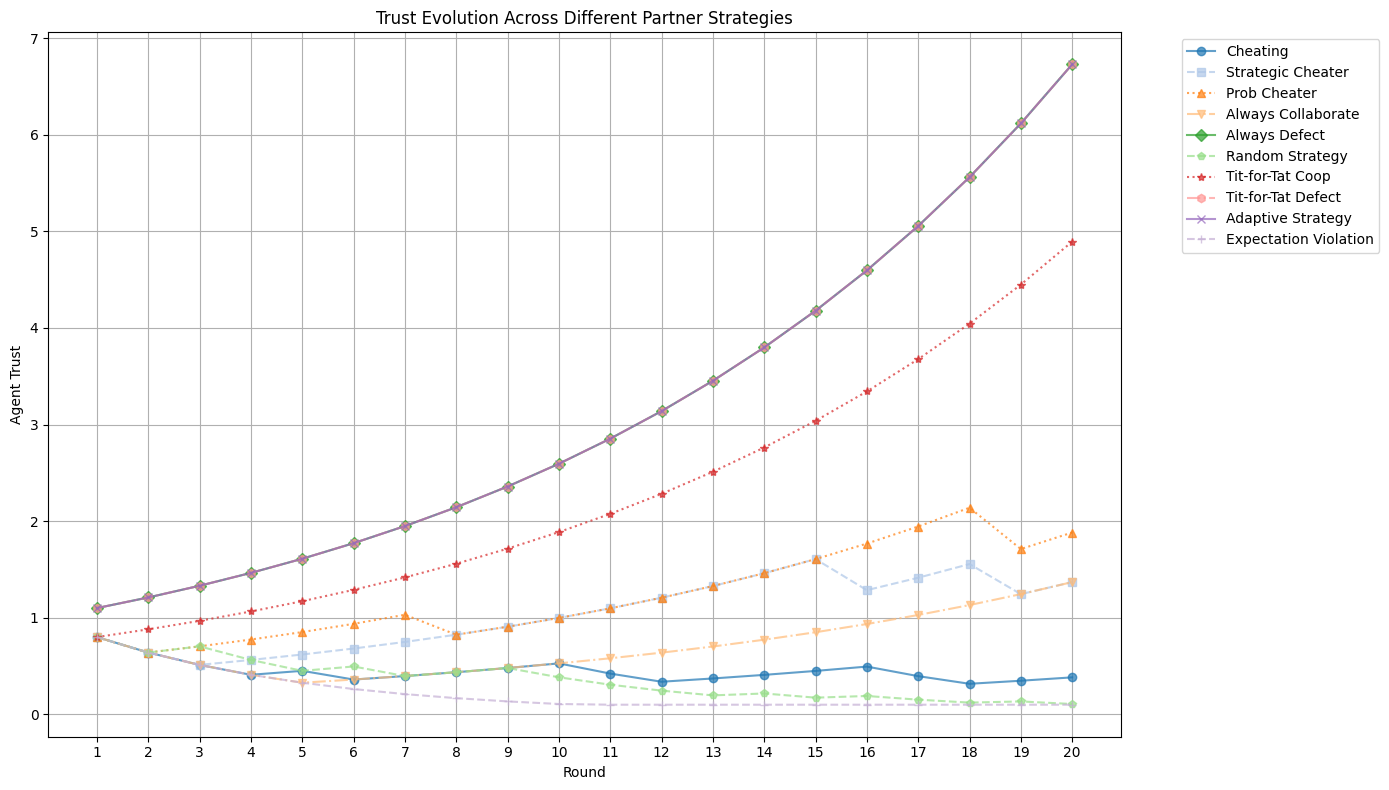

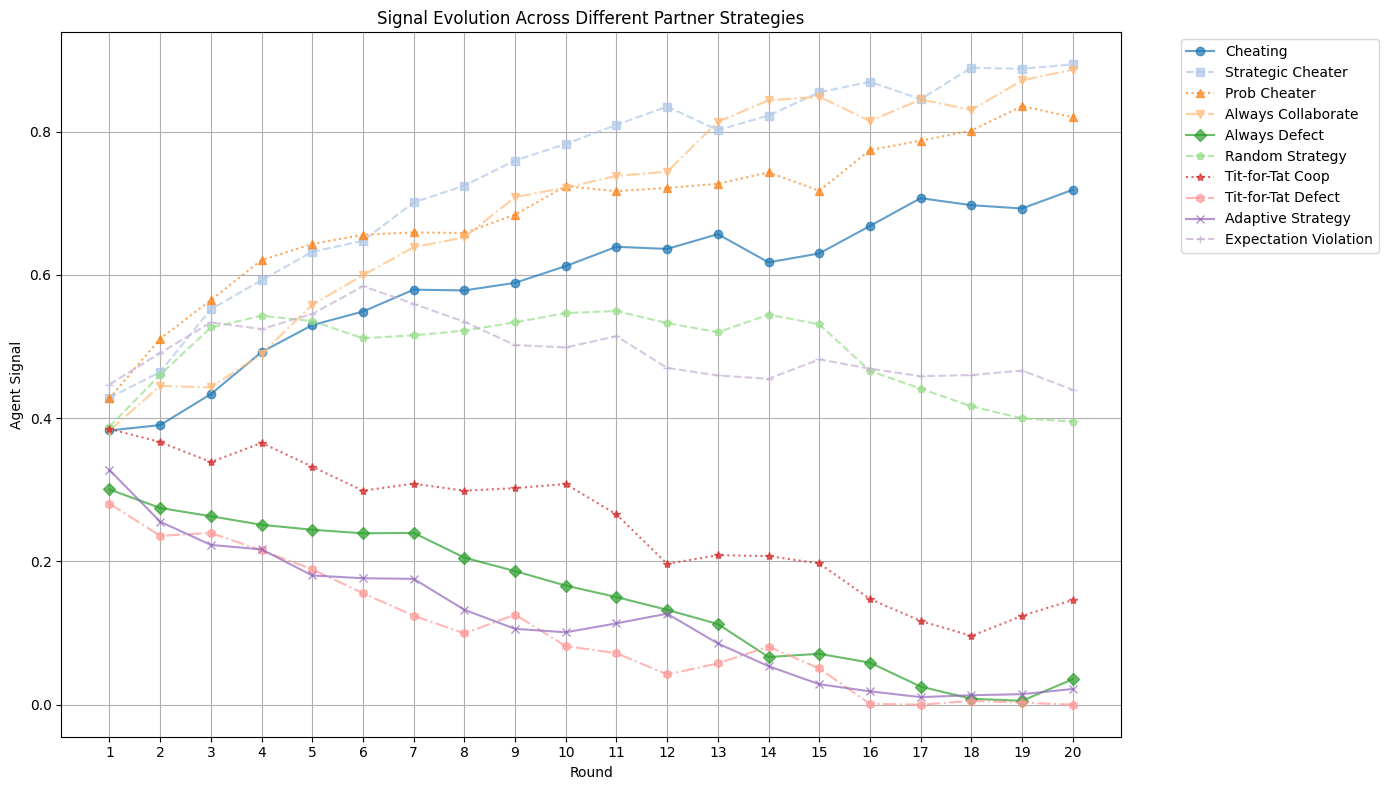

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

payoff = np.array([
    [[2, 2], [3, 0]], 
    [[0, 3], [4, 4]]
])

def get_payoff(player1_strategy, player2_strategy, player_id):
    return payoff[player1_strategy, player2_strategy][player_id]

class StagHuntAgent:
    def __init__(self, u_i=None, t_init=1.0, gamma_inc=1.1, gamma_dec=0.8, eta=0.1, noise_sigma=0.02):
        self.x = u_i if u_i is not None else 1 - ((get_payoff(0,0,0) - get_payoff(1,0,0)) / ((get_payoff(0,0,0) - get_payoff (1,0,0)) + (get_payoff(1,1,0) - get_payoff(0,1,0))))
        self.t = t_init  
        self.gamma_inc = gamma_inc
        self.gamma_dec = gamma_dec
        self.eta = eta  
        self.noise_sigma = noise_sigma  
    
    def expected_p(self):
        return (1 + self.x * self.t) / (2 + self.t)
    
    def make_decision(self):
        p = self.expected_p()
        E_V_hare = get_payoff(0, 0, 0) + p
        E_V_stag = get_payoff(1, 1, 0) * p
        D = E_V_stag - E_V_hare  
        return 1 if D > 0 else 0  
    
    def compute_new_trust(self, partner_choice):
        expected_choice = 1 if self.x > 0.5 else 0  
        new_trust = self.t * (self.gamma_inc if partner_choice == expected_choice else self.gamma_dec)
        return max(new_trust, 0.1)
    
    def compute_new_signal(self, P_obs):
        noise = np.random.normal(0, self.noise_sigma)  
        return np.clip(self.x + self.eta * (P_obs - self.x) + noise, 0, 1)
    
    def update_state(self, new_trust, new_signal):
        self.t = new_trust
        self.x = new_signal

def always_collaborate():
    return 1

def always_defect():
    return 0

def random_strategy():
    return random.choice([0, 1])

def tit_for_tat_cooperate(last_agent_choice=1):
    return last_agent_choice  

def tit_for_tat_defect(last_agent_choice=0):
    return last_agent_choice  

def adaptive_strategy(agent):
    return 1 if agent.x > 0.5 else 0  

def cheating_partner(round_num, cycle_length=5, cheat_duration=2):
    return 1 if (round_num % (cycle_length + cheat_duration)) < cycle_length else 0

def probabilistic_cheater():
    return 1 if random.random() < 0.7 else 0

def strategic_cheater(agent):
    return 0 if agent.t > 1.5 else 1

def expectation_violation_cheater(agent):
    """A partner that cheats by doing the opposite of what the agent expects."""
    return 0 if agent.x > 0.5 else 1

def run_single_agent_simulation(u_i, num_rounds=20, strategy=always_collaborate, initial_last_choice=1, strategy_kwargs={}):
    agent = StagHuntAgent(u_i=u_i)
    results = []
    last_agent_choice = initial_last_choice
    partner_choices = []
    
    for round_num in range(num_rounds):
        agent_choice = agent.make_decision()
        
        if strategy in [tit_for_tat_cooperate, tit_for_tat_defect]:
            partner_choice = strategy(last_agent_choice)
        elif strategy in [adaptive_strategy, strategic_cheater, expectation_violation_cheater]:
            partner_choice = strategy(agent)
        elif strategy == cheating_partner:
            partner_choice = strategy(round_num, **strategy_kwargs)
        else:
            partner_choice = strategy()
        
        partner_choices.append(partner_choice)

        P_obs = sum(partner_choices) / len(partner_choices) if partner_choices else agent.x

        new_trust = agent.compute_new_trust(partner_choice)
        new_signal = agent.compute_new_signal(P_obs)

        agent.update_state(new_trust, new_signal)

        last_agent_choice = agent_choice  
        results.append((round_num + 1, agent_choice, partner_choice, agent.x, agent.t))
    
    return results

# Run simulations with all strategies including the new expectation_violation_cheater
sim_results_cheating = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=cheating_partner, strategy_kwargs={"cycle_length": 4, "cheat_duration": 2})
sim_results_strategic_cheater = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=strategic_cheater)
sim_results_prob_cheater = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=probabilistic_cheater)
sim_results_tit_for_tat_coop = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=tit_for_tat_cooperate, initial_last_choice=1)
sim_results_tit_for_tat_defect = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=tit_for_tat_defect, initial_last_choice=0)
sim_results_collab = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=always_collaborate)
sim_results_defect = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=always_defect)
sim_results_random = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=random_strategy)
sim_results_adaptive = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=adaptive_strategy)
sim_results_expect_violation = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=expectation_violation_cheater)

# Convert to DataFrames
df_cheating = pd.DataFrame(sim_results_cheating, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_strategic_cheater = pd.DataFrame(sim_results_strategic_cheater, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_prob_cheater = pd.DataFrame(sim_results_prob_cheater, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_collab = pd.DataFrame(sim_results_collab, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_defect = pd.DataFrame(sim_results_defect, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_random = pd.DataFrame(sim_results_random, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_tit_for_tat_coop = pd.DataFrame(sim_results_tit_for_tat_coop, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_tit_for_tat_defect = pd.DataFrame(sim_results_tit_for_tat_defect, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_adaptive = pd.DataFrame(sim_results_adaptive, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_expect_violation = pd.DataFrame(sim_results_expect_violation, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])


import matplotlib.pyplot as plt
import seaborn as sns

# Define a distinct color palette (using seaborn's "tab10" or "tab20" for more colors)
colors = sns.color_palette("tab20", 10)  # 10 distinct colors for 10 strategies

# Define line styles and markers to differentiate the lines
line_styles = ['-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--']
markers = ['o', 's', '^', 'v', 'D', 'p', '*', 'h', 'x', '+']

# Visualize Trust Evolution
plt.figure(figsize=(14, 8))  # Increase figure size
plt.plot(df_cheating["Round"], df_cheating["Agent_Trust"], label="Cheating", 
         color=colors[0], linestyle=line_styles[0], marker=markers[0], alpha=0.7)
plt.plot(df_strategic_cheater["Round"], df_strategic_cheater["Agent_Trust"], label="Strategic Cheater", 
         color=colors[1], linestyle=line_styles[1], marker=markers[1], alpha=0.7)
plt.plot(df_prob_cheater["Round"], df_prob_cheater["Agent_Trust"], label="Prob Cheater", 
         color=colors[2], linestyle=line_styles[2], marker=markers[2], alpha=0.7)
plt.plot(df_collab["Round"], df_collab["Agent_Trust"], label="Always Collaborate", 
         color=colors[3], linestyle=line_styles[3], marker=markers[3], alpha=0.7)
plt.plot(df_defect["Round"], df_defect["Agent_Trust"], label="Always Defect", 
         color=colors[4], linestyle=line_styles[4], marker=markers[4], alpha=0.7)
plt.plot(df_random["Round"], df_random["Agent_Trust"], label="Random Strategy", 
         color=colors[5], linestyle=line_styles[5], marker=markers[5], alpha=0.7)
plt.plot(df_tit_for_tat_coop["Round"], df_tit_for_tat_coop["Agent_Trust"], label="Tit-for-Tat Coop", 
         color=colors[6], linestyle=line_styles[6], marker=markers[6], alpha=0.7)
plt.plot(df_tit_for_tat_defect["Round"], df_tit_for_tat_defect["Agent_Trust"], label="Tit-for-Tat Defect", 
         color=colors[7], linestyle=line_styles[7], marker=markers[7], alpha=0.7)
plt.plot(df_adaptive["Round"], df_adaptive["Agent_Trust"], label="Adaptive Strategy", 
         color=colors[8], linestyle=line_styles[8], marker=markers[8], alpha=0.7)
plt.plot(df_expect_violation["Round"], df_expect_violation["Agent_Trust"], label="Expectation Violation", 
         color=colors[9], linestyle=line_styles[9], marker=markers[9], alpha=0.7)

plt.xlabel("Round")
plt.ylabel("Agent Trust")
plt.title("Trust Evolution Across Different Partner Strategies")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

# Visualize Signal Evolution
plt.figure(figsize=(14, 8))  # Increase figure size
plt.plot(df_cheating["Round"], df_cheating["Agent_Signal"], label="Cheating", 
         color=colors[0], linestyle=line_styles[0], marker=markers[0], alpha=0.7)
plt.plot(df_strategic_cheater["Round"], df_strategic_cheater["Agent_Signal"], label="Strategic Cheater", 
         color=colors[1], linestyle=line_styles[1], marker=markers[1], alpha=0.7)
plt.plot(df_prob_cheater["Round"], df_prob_cheater["Agent_Signal"], label="Prob Cheater", 
         color=colors[2], linestyle=line_styles[2], marker=markers[2], alpha=0.7)
plt.plot(df_collab["Round"], df_collab["Agent_Signal"], label="Always Collaborate", 
         color=colors[3], linestyle=line_styles[3], marker=markers[3], alpha=0.7)
plt.plot(df_defect["Round"], df_defect["Agent_Signal"], label="Always Defect", 
         color=colors[4], linestyle=line_styles[4], marker=markers[4], alpha=0.7)
plt.plot(df_random["Round"], df_random["Agent_Signal"], label="Random Strategy", 
         color=colors[5], linestyle=line_styles[5], marker=markers[5], alpha=0.7)
plt.plot(df_tit_for_tat_coop["Round"], df_tit_for_tat_coop["Agent_Signal"], label="Tit-for-Tat Coop", 
         color=colors[6], linestyle=line_styles[6], marker=markers[6], alpha=0.7)
plt.plot(df_tit_for_tat_defect["Round"], df_tit_for_tat_defect["Agent_Signal"], label="Tit-for-Tat Defect", 
         color=colors[7], linestyle=line_styles[7], marker=markers[7], alpha=0.7)
plt.plot(df_adaptive["Round"], df_adaptive["Agent_Signal"], label="Adaptive Strategy", 
         color=colors[8], linestyle=line_styles[8], marker=markers[8], alpha=0.7)
plt.plot(df_expect_violation["Round"], df_expect_violation["Agent_Signal"], label="Expectation Violation", 
         color=colors[9], linestyle=line_styles[9], marker=markers[9], alpha=0.7)

plt.xlabel("Round")
plt.ylabel("Agent Signal")
plt.title("Signal Evolution Across Different Partner Strategies")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

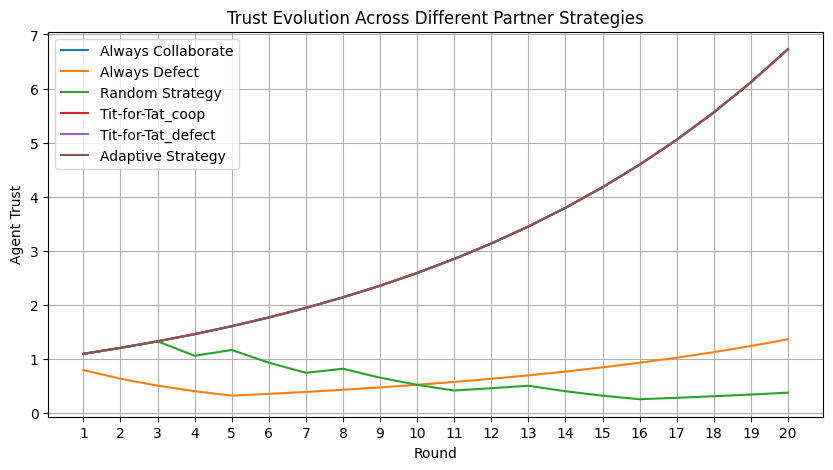

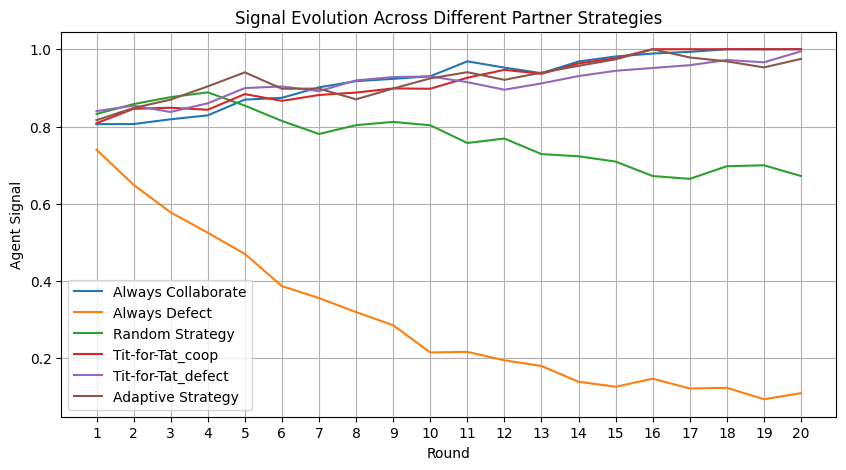

In [3]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

payoff = np.array([
    [[2, 2], [3, 0]], 
    [[0, 3], [11, 11]]
])

def get_payoff(player1_strategy, player2_strategy, player_id):
    return payoff[player1_strategy, player2_strategy][player_id]

class StagHuntAgent:
    def __init__(self, u_i=None, t_init=1.0, gamma_inc=1.1, gamma_dec=0.8, eta=0.1, noise_sigma=0.02):
        self.x = u_i if u_i is not None else 1 - ((get_payoff(0,0,0) - get_payoff(1,0,0)) / ((get_payoff(0,0,0) - get_payoff (1,0,0)) + (get_payoff(1,1,0) - get_payoff(0,1,0))))
        self.t = t_init  
        self.gamma_inc = gamma_inc
        self.gamma_dec = gamma_dec
        self.eta = eta  
        self.noise_sigma = noise_sigma  
    
    def expected_p(self):
        return (1 + self.x * self.t) / (2 + self.t)
    
    def make_decision(self):
        p = self.expected_p()
        E_V_hare = get_payoff(0, 0, 0) + p
        E_V_stag = get_payoff(1, 1, 0) * p
        D = E_V_stag - E_V_hare  
        return 1 if D > 0 else 0  
    
    def compute_new_trust(self, partner_choice):
        expected_choice = 1 if self.x > 0.5 else 0  
        new_trust = self.t * (self.gamma_inc if partner_choice == expected_choice else self.gamma_dec)
        return max(new_trust, 0.1)
    
    def compute_new_signal(self, P_obs):
        noise = np.random.normal(0, self.noise_sigma)  
        return np.clip(self.x + self.eta * (P_obs - self.x) + noise, 0, 1)
    
    def update_state(self, new_trust, new_signal):
        self.t = new_trust
        self.x = new_signal

def always_collaborate():
    return 1

def always_defect():
    return 0

def random_strategy():
    return random.choice([0, 1])

def tit_for_tat_cooperate(last_agent_choice=1):
    return last_agent_choice  

def tit_for_tat_defect(last_agent_choice=0):
    return last_agent_choice  

def adaptive_strategy(agent):
    return 1 if agent.x > 0.5 else 0  

def run_single_agent_simulation(u_i, num_rounds=20, strategy=always_collaborate):
    agent = StagHuntAgent(u_i=u_i)
    results = []
    last_agent_choice = 1
    partner_choices = []
    
    for round_num in range(num_rounds):
        agent_choice = agent.make_decision()
        partner_choice = strategy(agent) if strategy is adaptive_strategy else strategy(last_agent_choice) if strategy in [tit_for_tat_cooperate, tit_for_tat_defect] else strategy()
        partner_choices.append(partner_choice)

        P_obs = sum(partner_choices) / len(partner_choices) if partner_choices else agent.x
        new_trust = agent.compute_new_trust(partner_choice)
        new_signal = agent.compute_new_signal(P_obs)
        agent.update_state(new_trust, new_signal)

        last_agent_choice = agent_choice  
        results.append((round_num + 1, agent_choice, partner_choice, agent.x, agent.t))
    
    return results

sim_results_tit_for_tat_coop = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=tit_for_tat_cooperate)
sim_results_tit_for_tat_defect = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=tit_for_tat_defect)
sim_results_collab = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=always_collaborate)
sim_results_defect = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=always_defect)
sim_results_random = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=random_strategy)
sim_results_adaptive = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=adaptive_strategy)

# Convert to DataFrames
df_collab = pd.DataFrame(sim_results_collab, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_defect = pd.DataFrame(sim_results_defect, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_random = pd.DataFrame(sim_results_random, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_tit_for_tat_coopt = pd.DataFrame(sim_results_tit_for_tat_coop, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_tit_for_tat_defect = pd.DataFrame(sim_results_tit_for_tat_defect, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_adaptive = pd.DataFrame(sim_results_adaptive, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])

# Visualize Trust Evolution
plt.figure(figsize=(10, 5))
plt.plot(df_collab["Round"], df_collab["Agent_Trust"], label="Always Collaborate")
plt.plot(df_defect["Round"], df_defect["Agent_Trust"], label="Always Defect")
plt.plot(df_random["Round"], df_random["Agent_Trust"], label="Random Strategy")
plt.plot(df_tit_for_tat_coopt["Round"], df_tit_for_tat_coopt["Agent_Trust"], label="Tit-for-Tat_coop")
plt.plot(df_tit_for_tat_defect["Round"], df_tit_for_tat_defect["Agent_Trust"], label="Tit-for-Tat_defect")
plt.plot(df_adaptive["Round"], df_adaptive["Agent_Trust"], label="Adaptive Strategy")
plt.xlabel("Round")
plt.ylabel("Agent Trust")
plt.title("Trust Evolution Across Different Partner Strategies")
plt.legend()
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))  
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_collab["Round"], df_collab["Agent_Signal"], label="Always Collaborate")
plt.plot(df_defect["Round"], df_defect["Agent_Signal"], label="Always Defect")
plt.plot(df_random["Round"], df_random["Agent_Signal"], label="Random Strategy")
plt.plot(df_tit_for_tat_coopt["Round"], df_tit_for_tat_coopt["Agent_Signal"], label="Tit-for-Tat_coop")
plt.plot(df_tit_for_tat_defect["Round"], df_tit_for_tat_defect["Agent_Signal"], label="Tit-for-Tat_defect")
plt.plot(df_adaptive["Round"], df_adaptive["Agent_Signal"], label="Adaptive Strategy")
plt.xlabel("Round")
plt.ylabel("Agent Signal")
plt.title("Signal Evolution Across Different Partner Strategies")
plt.legend()
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))  
plt.show()



In [ ]:

payoff = np.array([
    [[2, 2], [3, 0]], 
    [[0, 3], [11, 11]]
])
import numpy as np

payoff = np.array([
    [[2, 2], [3, 0]], 
    [[0, 3], [4, 4]]
])

def get_payoff(player1_strategy, player2_strategy, player_id):
    return payoff[player1_strategy, player2_strategy][player_id]
a = 1 - ((get_payoff(0,0,0) - get_payoff(1,0,0)) / ((get_payoff(0,0,0) - get_payoff (1,0,0)) + (get_payoff(1,1,0) - get_payoff(0,1,0))))
a

0.33333333333333337

In [ ]:
#trust and signal equations
alpha = 2
beta = 2
t = alpha + beta - 2
x = (alpha - 1) / (alpha + beta - 2)
alpha = 1 + x * t
beta = 1 + (1 - x) * t

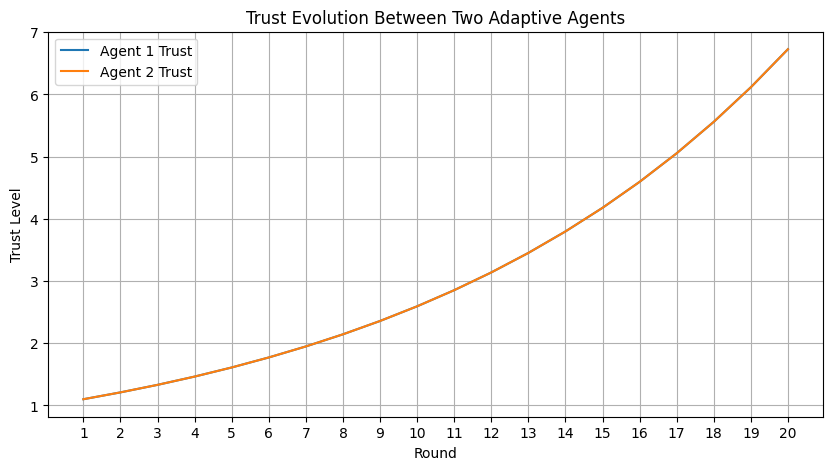

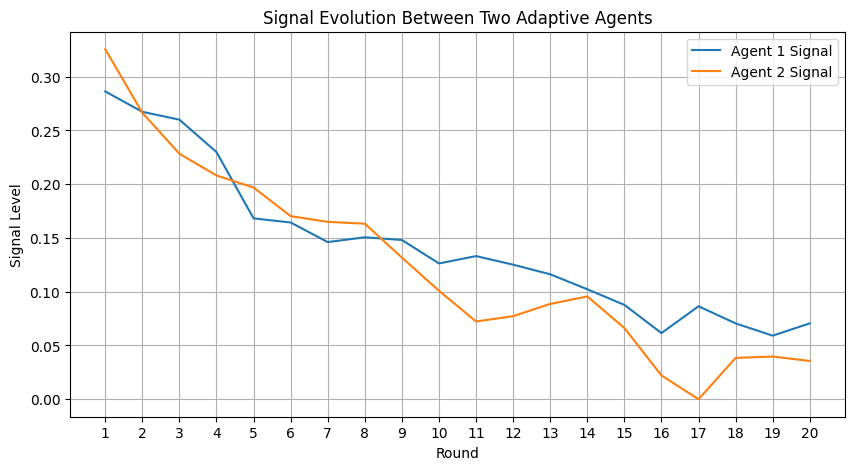

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

payoff = np.array([
    [[2, 2], [3, 0]], 
    [[0, 3], [4, 4]]
])

def get_payoff(player1_strategy, player2_strategy, player_id):
    return payoff[player1_strategy, player2_strategy][player_id]

class StagHuntAgent:
    def __init__(self, u_i=None, t_init=1.0, gamma_inc=1.1, gamma_dec=0.8, eta=0.1, noise_sigma=0.02):
        self.x = u_i if u_i is not None else 1 - ((get_payoff(0,0,0) - get_payoff(1,0,0)) / ((get_payoff(0,0,0) - get_payoff (1,0,0)) + (get_payoff(1,1,0) - get_payoff(0,1,0))))
        self.t = t_init  
        self.gamma_inc = gamma_inc
        self.gamma_dec = gamma_dec
        self.eta = eta  
        self.noise_sigma = noise_sigma  
    
    def expected_p(self):
        return (1 + self.x * self.t) / (2 + self.t)
    
    def make_decision(self):
        p = self.expected_p()
        E_V_hare = get_payoff(0, 0, 0) + p
        E_V_stag = get_payoff(1, 1, 0) * p
        D = E_V_stag - E_V_hare  
        return 1 if D > 0 else 0  
    
    def compute_new_trust(self, partner_choice):
        expected_choice = 1 if self.x > 0.5 else 0  
        new_trust = self.t * (self.gamma_inc if partner_choice == expected_choice else self.gamma_dec)
        return max(new_trust, 0.1)
    
    def compute_new_signal(self, P_obs):
        noise = np.random.normal(0, self.noise_sigma)  
        return np.clip(self.x + self.eta * (P_obs - self.x) + noise, 0, 1)
    
    def update_state(self, new_trust, new_signal):
        self.t = new_trust
        self.x = new_signal

def run_two_agent_simulation(u_i1, u_i2, num_rounds=20):
    agent1 = StagHuntAgent(u_i=u_i1)
    agent2 = StagHuntAgent(u_i=u_i2)
    results = []
    
    for round_num in range(num_rounds):
        agent1_choice = agent1.make_decision()
        agent2_choice = agent2.make_decision()
        
        # Compute observed probabilities
        P_obs1 = agent2_choice
        P_obs2 = agent1_choice
        
        # Compute new trust and signal for both agents
        new_trust1 = agent1.compute_new_trust(agent2_choice)
        new_signal1 = agent1.compute_new_signal(P_obs1)
        new_trust2 = agent2.compute_new_trust(agent1_choice)
        new_signal2 = agent2.compute_new_signal(P_obs2)
        
        # Apply updates
        agent1.update_state(new_trust1, new_signal1)
        agent2.update_state(new_trust2, new_signal2)
        
        results.append((round_num + 1, agent1_choice, agent2_choice, agent1.x, agent1.t, agent2.x, agent2.t))
    
    return results

sim_results_two_agents = run_two_agent_simulation(u_i1=None, u_i2=None, num_rounds=20)
df_two_agents = pd.DataFrame(sim_results_two_agents, columns=["Round", "Agent1_Choice", "Agent2_Choice", "Agent1_Signal", "Agent1_Trust", "Agent2_Signal", "Agent2_Trust"])

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(df_two_agents["Round"], df_two_agents["Agent1_Trust"], label="Agent 1 Trust")
plt.plot(df_two_agents["Round"], df_two_agents["Agent2_Trust"], label="Agent 2 Trust")
plt.xlabel("Round")
plt.ylabel("Trust Level")
plt.title("Trust Evolution Between Two Adaptive Agents")
plt.legend()
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))  
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_two_agents["Round"], df_two_agents["Agent1_Signal"], label="Agent 1 Signal")
plt.plot(df_two_agents["Round"], df_two_agents["Agent2_Signal"], label="Agent 2 Signal")
plt.xlabel("Round")
plt.ylabel("Signal Level")
plt.title("Signal Evolution Between Two Adaptive Agents")
plt.legend()
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))  
plt.show()

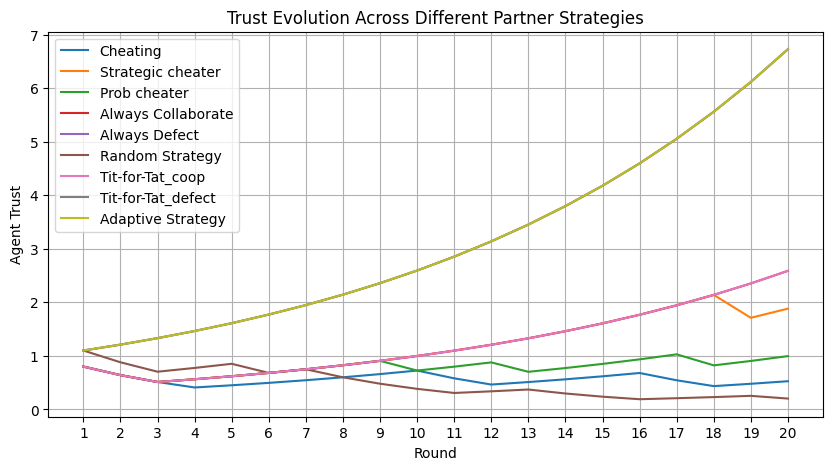

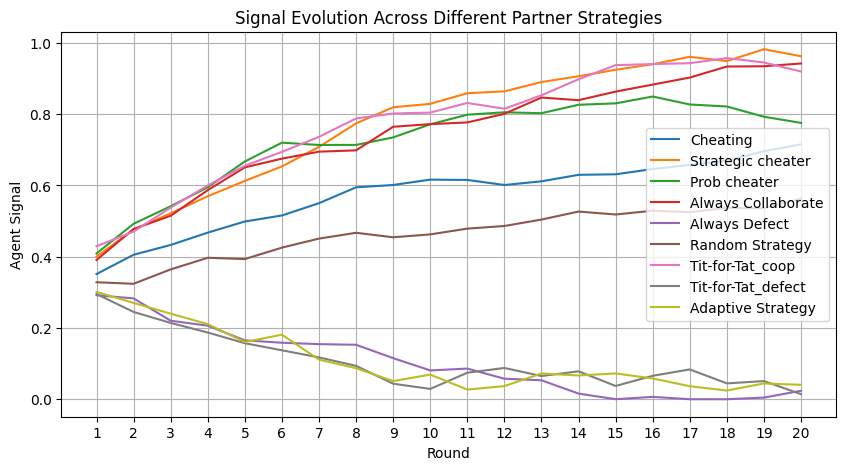

Agent Signal in Round 3: 0.5120000000000001


In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

payoff = np.array([
    [[2, 2], [3, 0]], 
    [[0, 3], [4, 4]]
])

def get_payoff(player1_strategy, player2_strategy, player_id):
    return payoff[player1_strategy, player2_strategy][player_id]

class StagHuntAgent:
    def __init__(self, u_i=None, t_init=1.0, gamma_inc=1.1, gamma_dec=0.8, eta=0.1, noise_sigma=0.02):
        self.x = u_i if u_i is not None else 1 - ((get_payoff(0,0,0) - get_payoff(1,0,0)) / ((get_payoff(0,0,0) - get_payoff (1,0,0)) + (get_payoff(1,1,0) - get_payoff(0,1,0))))
        self.t = t_init  
        self.gamma_inc = gamma_inc
        self.gamma_dec = gamma_dec
        self.eta = eta  
        self.noise_sigma = noise_sigma  
    
    def expected_p(self):
        return (1 + self.x * self.t) / (2 + self.t)
    
    def make_decision(self):
        p = self.expected_p()
        E_V_hare = get_payoff(0, 0, 0) + p
        E_V_stag = get_payoff(1, 1, 0) * p
        D = E_V_stag - E_V_hare  
        return 1 if D > 0 else 0  
    
    def compute_new_trust(self, partner_choice):
        expected_choice = 1 if self.x > 0.5 else 0  
        new_trust = self.t * (self.gamma_inc if partner_choice == expected_choice else self.gamma_dec)
        return max(new_trust, 0.1)
    
    def compute_new_signal(self, P_obs):
        noise = np.random.normal(0, self.noise_sigma)  
        return np.clip(self.x + self.eta * (P_obs - self.x) + noise, 0, 1)
    
    def update_state(self, new_trust, new_signal):
        self.t = new_trust
        self.x = new_signal

def always_collaborate():
    return 1

def always_defect():
    return 0

def random_strategy():
    return random.choice([0, 1])

def tit_for_tat_cooperate(last_agent_choice=1):
    return last_agent_choice  

def tit_for_tat_defect(last_agent_choice=0):
    return last_agent_choice  

def adaptive_strategy(agent):
    return 1 if agent.x > 0.5 else 0  

def cheating_partner(round_num, cycle_length=5, cheat_duration=2):
    return 1 if (round_num % (cycle_length + cheat_duration)) < cycle_length else 0

def probabilistic_cheater():
    return 1 if random.random() < 0.8 else 0

def strategic_cheater(agent):
    return 0 if agent.t > 2.0 else 1

def expectation_violation_cheater(agent):
    """A partner that cheats by doing the opposite of what the agent expects."""
    return 0 if agent.x > 0.5 else 1

def run_single_agent_simulation(u_i, num_rounds=20, strategy=always_collaborate, initial_last_choice=1, strategy_kwargs={}):
    agent = StagHuntAgent(u_i=u_i)
    results = []
    last_agent_choice = initial_last_choice
    partner_choices = []
    
    for round_num in range(num_rounds):
        agent_choice = agent.make_decision()
        
        if strategy in [cheating_partner, strategic_cheater]:
            partner_choice = strategy(agent) if strategy is strategic_cheater else strategy(round_num, **strategy_kwargs)
        else:
            partner_choice = strategy(agent) if strategy is adaptive_strategy else strategy()
        
        partner_choices.append(partner_choice)

        P_obs = sum(partner_choices) / len(partner_choices) if partner_choices else agent.x

        new_trust = agent.compute_new_trust(partner_choice)
        new_signal = agent.compute_new_signal(P_obs)

        agent.update_state(new_trust, new_signal)

        last_agent_choice = agent_choice  
        results.append((round_num + 1, agent_choice, partner_choice, agent.x, agent.t))
    
    return results

sim_results_cheating = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=cheating_partner, strategy_kwargs={"cycle_length": 4, "cheat_duration": 2})
sim_results_strategic_cheater = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=strategic_cheater)
sim_results_prob_cheater = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=probabilistic_cheater)
sim_results_tit_for_tat_coop = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=tit_for_tat_cooperate)
sim_results_tit_for_tat_defect = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=tit_for_tat_defect)
sim_results_collab = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=always_collaborate)
sim_results_defect = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=always_defect)
sim_results_random = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=random_strategy)
sim_results_adaptive = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=adaptive_strategy)

# Convert to DataFrames
df_cheating = pd.DataFrame(sim_results_cheating, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_strategic_cheater = pd.DataFrame(sim_results_strategic_cheater, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_prob_cheater = pd.DataFrame(sim_results_prob_cheater, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_collab = pd.DataFrame(sim_results_collab, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_defect = pd.DataFrame(sim_results_defect, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_random = pd.DataFrame(sim_results_random, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_tit_for_tat_coopt = pd.DataFrame(sim_results_tit_for_tat_coop, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_tit_for_tat_defect = pd.DataFrame(sim_results_tit_for_tat_defect, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_adaptive = pd.DataFrame(sim_results_adaptive, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])

# Visualize Trust Evolution
plt.figure(figsize=(10, 5))
plt.plot(df_cheating["Round"], df_cheating["Agent_Trust"], label="Cheating")
plt.plot(df_strategic_cheater["Round"], df_strategic_cheater["Agent_Trust"], label="Strategic cheater")
plt.plot(df_prob_cheater["Round"], df_prob_cheater["Agent_Trust"], label="Prob cheater")

plt.plot(df_collab["Round"], df_collab["Agent_Trust"], label="Always Collaborate")
plt.plot(df_defect["Round"], df_defect["Agent_Trust"], label="Always Defect")
plt.plot(df_random["Round"], df_random["Agent_Trust"], label="Random Strategy")
plt.plot(df_tit_for_tat_coopt["Round"], df_tit_for_tat_coopt["Agent_Trust"], label="Tit-for-Tat_coop")
plt.plot(df_tit_for_tat_defect["Round"], df_tit_for_tat_defect["Agent_Trust"], label="Tit-for-Tat_defect")
plt.plot(df_adaptive["Round"], df_adaptive["Agent_Trust"], label="Adaptive Strategy")
plt.xlabel("Round")
plt.ylabel("Agent Trust")
plt.title("Trust Evolution Across Different Partner Strategies")
plt.legend()
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))  
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_cheating["Round"], df_cheating["Agent_Signal"], label="Cheating")
plt.plot(df_strategic_cheater["Round"], df_strategic_cheater["Agent_Signal"], label="Strategic cheater")
plt.plot(df_prob_cheater["Round"], df_prob_cheater["Agent_Signal"], label="Prob cheater")

plt.plot(df_collab["Round"], df_collab["Agent_Signal"], label="Always Collaborate")
plt.plot(df_defect["Round"], df_defect["Agent_Signal"], label="Always Defect")
plt.plot(df_random["Round"], df_random["Agent_Signal"], label="Random Strategy")
plt.plot(df_tit_for_tat_coopt["Round"], df_tit_for_tat_coopt["Agent_Signal"], label="Tit-for-Tat_coop")
plt.plot(df_tit_for_tat_defect["Round"], df_tit_for_tat_defect["Agent_Signal"], label="Tit-for-Tat_defect")
plt.plot(df_adaptive["Round"], df_adaptive["Agent_Signal"], label="Adaptive Strategy")
plt.xlabel("Round")
plt.ylabel("Agent Signal")
plt.title("Signal Evolution Across Different Partner Strategies")
plt.legend()
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))  
plt.show()

round_3_trust = df_collab.loc[df_collab['Round'] == 3, 'Agent_Trust'].values[0]
print(f"Agent Signal in Round 3: {round_3_trust}")

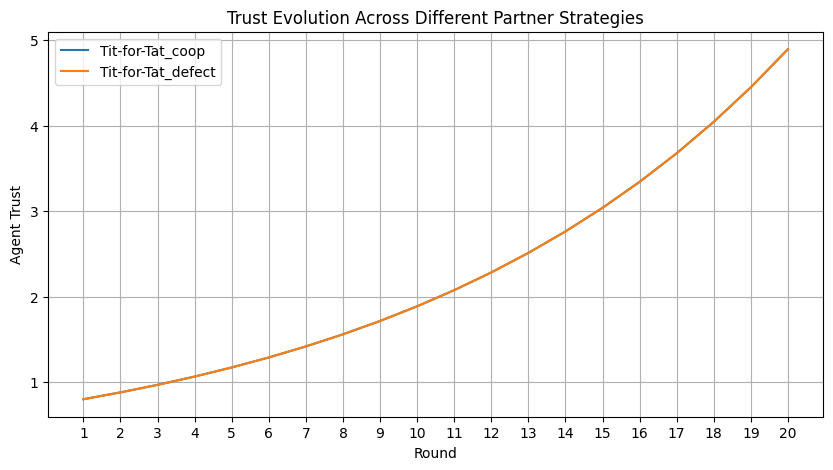

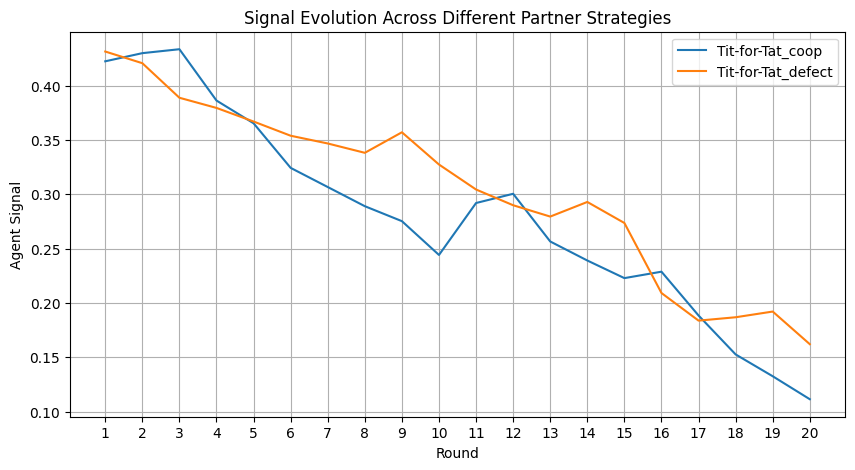

Agent Signal in Round 3: 0.5120000000000001


In [21]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

payoff = np.array([
    [[2, 2], [3, 0]], 
    [[0, 3], [4, 4]]
])

def get_payoff(player1_strategy, player2_strategy, player_id):
    return payoff[player1_strategy, player2_strategy][player_id]

class StagHuntAgent:
    def __init__(self, u_i=None, t_init=1.0, gamma_inc=1.1, gamma_dec=0.8, eta=0.1, noise_sigma=0.02):
        self.x = u_i if u_i is not None else 1 - ((get_payoff(0,0,0) - get_payoff(1,0,0)) / ((get_payoff(0,0,0) - get_payoff (1,0,0)) + (get_payoff(1,1,0) - get_payoff(0,1,0))))
        self.t = t_init  
        self.gamma_inc = gamma_inc
        self.gamma_dec = gamma_dec
        self.eta = eta  
        self.noise_sigma = noise_sigma  
    
    def expected_p(self):
        return (1 + self.x * self.t) / (2 + self.t)
    
    def make_decision(self):
        p = self.expected_p()
        E_V_hare = get_payoff(0, 0, 0) + p
        E_V_stag = get_payoff(1, 1, 0) * p
        D = E_V_stag - E_V_hare  
        return 1 if D > 0 else 0  
    
    def compute_new_trust(self, partner_choice):
        expected_choice = 1 if self.x > 0.5 else 0  
        new_trust = self.t * (self.gamma_inc if partner_choice == expected_choice else self.gamma_dec)
        return max(new_trust, 0.1)
    
    def compute_new_signal(self, P_obs):
        noise = np.random.normal(0, self.noise_sigma)  
        return np.clip(self.x + self.eta * (P_obs - self.x) + noise, 0, 1)
    
    def update_state(self, new_trust, new_signal):
        self.t = new_trust
        self.x = new_signal

def always_collaborate():
    return 1

def always_defect():
    return 0

def random_strategy():
    return random.choice([0, 1])

def tit_for_tat_cooperate(last_agent_choice=1):
    return last_agent_choice  

def tit_for_tat_defect(last_agent_choice=0):
    return last_agent_choice  

def adaptive_strategy(agent):
    return 1 if agent.x > 0.5 else 0  

def run_single_agent_simulation(u_i, num_rounds=20, strategy=always_collaborate, initial_last_choice=1):
    agent = StagHuntAgent(u_i=u_i)
    results = []
    last_agent_choice = initial_last_choice  # Start with the correct initial last choice
    partner_choices = []
    
    for round_num in range(num_rounds):
        agent_choice = agent.make_decision()
        
        # Apply correct Tit-for-Tat behavior
        if strategy is tit_for_tat_defect or strategy is tit_for_tat_cooperate:
            partner_choice = strategy(last_agent_choice)
        else:
            partner_choice = strategy(agent) if strategy is adaptive_strategy else strategy()
        
        partner_choices.append(partner_choice)

        # Compute P_obs (observed probability of collaboration)
        P_obs = sum(partner_choices) / len(partner_choices) if partner_choices else agent.x

        # Compute new trust and signal separately
        new_trust = agent.compute_new_trust(partner_choice)
        new_signal = agent.compute_new_signal(P_obs)

        # Apply updates to state variables
        agent.update_state(new_trust, new_signal)

        last_agent_choice = agent_choice  # Update independently for each strategy
        results.append((round_num + 1, agent_choice, partner_choice, agent.x, agent.t))
    
    return results

sim_results_tit_for_tat_coop = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=tit_for_tat_cooperate)
sim_results_tit_for_tat_defect = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=tit_for_tat_defect)
sim_results_collab = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=always_collaborate)
sim_results_defect = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=always_defect)
sim_results_random = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=random_strategy)
sim_results_adaptive = run_single_agent_simulation(u_i=None, num_rounds=20, strategy=adaptive_strategy)

# Convert to DataFrames
df_collab = pd.DataFrame(sim_results_collab, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_defect = pd.DataFrame(sim_results_defect, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_random = pd.DataFrame(sim_results_random, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_tit_for_tat_coopt = pd.DataFrame(sim_results_tit_for_tat_coop, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_tit_for_tat_defect = pd.DataFrame(sim_results_tit_for_tat_defect, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])
df_adaptive = pd.DataFrame(sim_results_adaptive, columns=["Round", "Agent_Choice", "Partner_Choice", "Agent_Signal", "Agent_Trust"])

# Visualize Trust Evolution
plt.figure(figsize=(10, 5))

plt.plot(df_tit_for_tat_coopt["Round"], df_tit_for_tat_coopt["Agent_Trust"], label="Tit-for-Tat_coop")
plt.plot(df_tit_for_tat_defect["Round"], df_tit_for_tat_defect["Agent_Trust"], label="Tit-for-Tat_defect")

plt.xlabel("Round")
plt.ylabel("Agent Trust")
plt.title("Trust Evolution Across Different Partner Strategies")
plt.legend()
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))  
plt.show()

plt.figure(figsize=(10, 5))

plt.plot(df_tit_for_tat_coopt["Round"], df_tit_for_tat_coopt["Agent_Signal"], label="Tit-for-Tat_coop")
plt.plot(df_tit_for_tat_defect["Round"], df_tit_for_tat_defect["Agent_Signal"], label="Tit-for-Tat_defect")

plt.xlabel("Round")
plt.ylabel("Agent Signal")
plt.title("Signal Evolution Across Different Partner Strategies")
plt.legend()
plt.grid()
plt.xticks(ticks=np.arange(1, 21, step=1))  
plt.show()

round_3_trust = df_collab.loc[df_collab['Round'] == 3, 'Agent_Trust'].values[0]
print(f"Agent Signal in Round 3: {round_3_trust}")

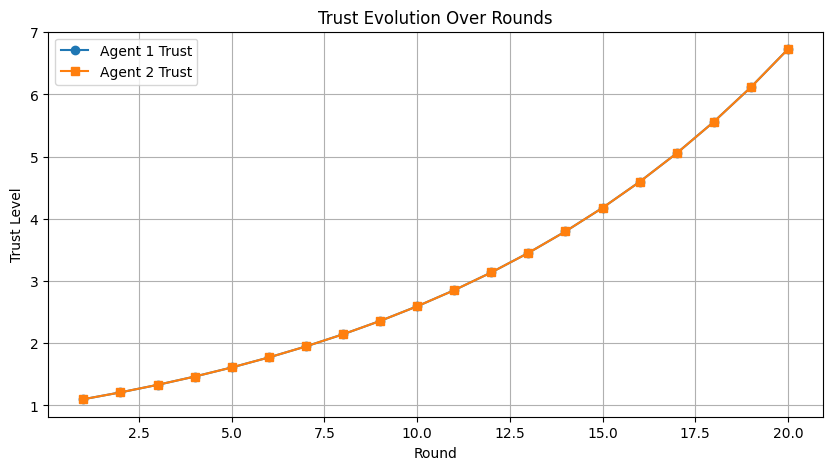

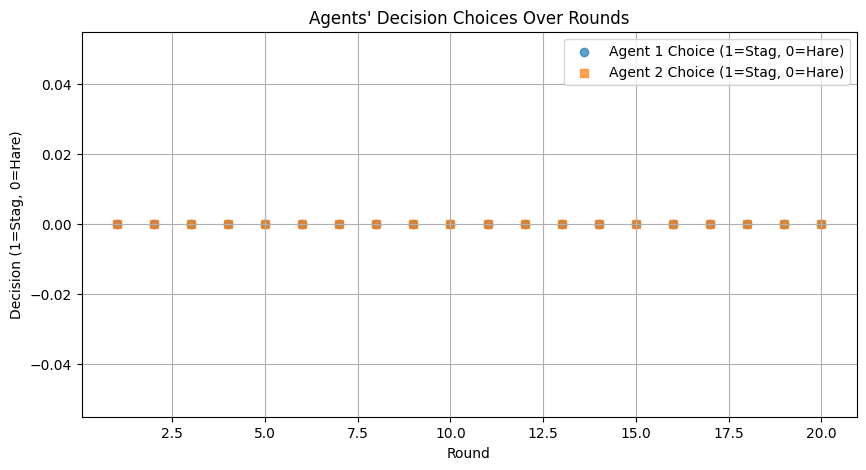

In [52]:
import numpy as np
import random

class StagHuntAgent:
    def __init__(self, x_init=0.5, t_init=1.0, gamma_inc=1.1, gamma_dec=0.9):
        """
        Initialize an agent with:
        x_init: Initial expected probability of collaboration (signal)
        t_init: Initial trust level
        gamma_inc: Trust increase multiplier (if expectation is met)
        gamma_dec: Trust decrease multiplier (if expectation is violated)
        """
        self.x = x_init  # Expected probability of collaboration
        self.t = t_init  # Trust level
        self.gamma_inc = gamma_inc
        self.gamma_dec = gamma_dec
    
    def expected_p(self):
        """Compute the expected probability of collaboration from trust parameters."""
        return (1 + self.x * self.t) / (2 + self.t)
    
    def make_decision(self, payoffs):
        """
        Decide whether to play Stag (1) or Hare (0) based on expected payoffs.
        """
        p = self.expected_p()
        E_V_hare = 2 + p
        E_V_stag = 4 * p
        D = E_V_stag - E_V_hare  # Incentive function
        
        return 1 if D > 0 else 0  # 1 for Stag, 0 for Hare
    
    def update_trust(self, partner_choice):
        """
        Update trust based on whether the partner's decision aligns with expectations.
        """
        expected_choice = 1 if self.x > 0.5 else 0  # Predict partner's choice
        
        if partner_choice == expected_choice:
            self.t *= self.gamma_inc  # Increase trust
        else:
            self.t *= self.gamma_dec  # Decrease trust
        
        # Ensure trust does not fall below a minimum threshold
        self.t = max(self.t, 0.1)
        
        # Update x based on recent observations (this could be further refined)
        self.x = (self.x * self.t + partner_choice) / (self.t + 1)

# Simulation Setup
def run_simulation(num_rounds=10):
    agent1 = StagHuntAgent()
    agent2 = StagHuntAgent()
    
    results = []
    
    for round_num in range(num_rounds):
        decision1 = agent1.make_decision(payoffs=None)
        decision2 = agent2.make_decision(payoffs=None)
        
        agent1.update_trust(decision2)
        agent2.update_trust(decision1)
        
        results.append((round_num + 1, decision1, decision2, agent1.t, agent2.t))
    
    return results

# Run the simulation
simulation_results = run_simulation(num_rounds=20)

# Display results
import pandas as pd
df_results = pd.DataFrame(simulation_results, columns=["Round", "Agent1_Choice", "Agent2_Choice", "Agent1_Trust", "Agent2_Trust"])

import matplotlib.pyplot as plt

# Extract data for visualization
rounds = df_results["Round"]
agent1_trust = df_results["Agent1_Trust"]
agent2_trust = df_results["Agent2_Trust"]
agent1_choices = df_results["Agent1_Choice"]
agent2_choices = df_results["Agent2_Choice"]

# Plot trust evolution
plt.figure(figsize=(10, 5))
plt.plot(rounds, agent1_trust, label="Agent 1 Trust", marker="o")
plt.plot(rounds, agent2_trust, label="Agent 2 Trust", marker="s")
plt.xlabel("Round")
plt.ylabel("Trust Level")
plt.title("Trust Evolution Over Rounds")
plt.legend()
plt.grid()
plt.show()

# Plot decision choices
plt.figure(figsize=(10, 5))
plt.scatter(rounds, agent1_choices, label="Agent 1 Choice (1=Stag, 0=Hare)", marker="o", alpha=0.7)
plt.scatter(rounds, agent2_choices, label="Agent 2 Choice (1=Stag, 0=Hare)", marker="s", alpha=0.7)
plt.xlabel("Round")
plt.ylabel("Decision (1=Stag, 0=Hare)")
plt.title("Agents' Decision Choices Over Rounds")
plt.legend()
plt.grid()
plt.show()


In [48]:
#random variables P, which is perceived probability of collaboration
E_p = (1+x*t)/ (2+t)

#Expected value of pure strategies
E_V_hare = 2 + E_p
E_V_stag = 4 * E_p

# Incentive function
D = 3 * E_p - 2

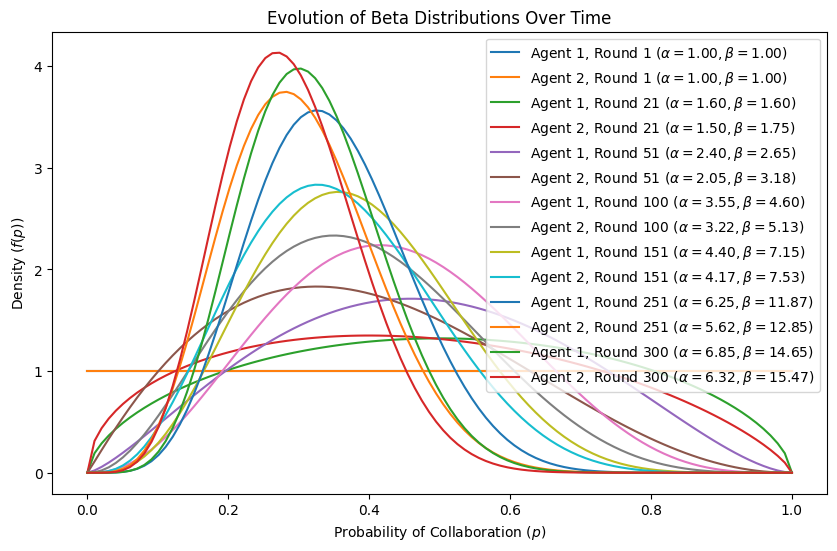

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Set random seed for reproducibility
np.random.seed(42)

# Simulation Parameters
num_agents = 2  
num_rounds = 300  
alpha_growth = 0.05  
beta_growth = 0.075  
lambda_recovery = 0.02  
m_recovery = 5  # Number of consecutive Stag choices required for accelerated recovery

# Initialize Beta distribution parameters (initial beliefs about collaboration probability)
alpha_values = [np.ones(num_agents)]
beta_values = [np.ones(num_agents)]  

# History for visualization
history = {
    "actions": [[] for _ in range(num_agents)],
    "beliefs": [[] for _ in range(num_agents)]
}

# Function to determine action based on expected probability
def choose_action(expected_p):
    return int(np.random.rand() < expected_p)  

# Run simulation
for _ in range(num_rounds):
    current_alpha = alpha_values[-1].copy()  
    current_beta = beta_values[-1].copy() 
    
    expected_p = current_alpha / (current_alpha + current_beta) 
    
    actions = [choose_action(expected_p[i]) for i in range(num_agents)]  
    
    for i in range(num_agents):
        # Track consecutive Stag choices for trust recovery acceleration
        if len(history["actions"][i]) >= m_recovery and all(a == 1 for a in history["actions"][i][-m_recovery:]):
            alpha_increment = alpha_growth + lambda_recovery  # Increase trust gain if agent consistently chooses Stag
        else:
            alpha_increment = alpha_growth
        
        # Update Beta distribution based on observed action
        if actions[i] == 1:  # Stag chosen
            current_alpha[i] += alpha_increment  # Increase belief in collaboration (slow)
        else:  # Hare chosen
            current_beta[i] += beta_growth  # Increase belief in defection (fast)

        history["actions"][i].append(actions[i])
        history["beliefs"][i].append(expected_p[i])
    
    alpha_values.append(current_alpha)
    beta_values.append(current_beta)

alpha_values = np.array(alpha_values)
beta_values = np.array(beta_values)

# Generate Beta distributions at different simulation time steps
time_steps = [0, 20, 50, 99, 150, 250, 299] 

plt.figure(figsize=(10, 6))

# Define probability range
p = np.linspace(0, 1, 100)

# Iterate through selected time steps and plot distributions
for t in time_steps:
    for i in range(num_agents):
        alpha_t = alpha_values[t, i]  # Alpha at current time step
        beta_t = beta_values[t, i]  

        plt.plot(p, beta.pdf(p, alpha_t, beta_t), 
                 label=f"Agent {i+1}, Round {t+1} ($\\alpha={alpha_t:.2f}, \\beta={beta_t:.2f}$)")

# Formatting the plot
plt.xlabel("Probability of Collaboration ($p$)")
plt.ylabel("Density ($f(p)$)")
plt.title("Evolution of Beta Distributions Over Time")
plt.legend()
plt.show()

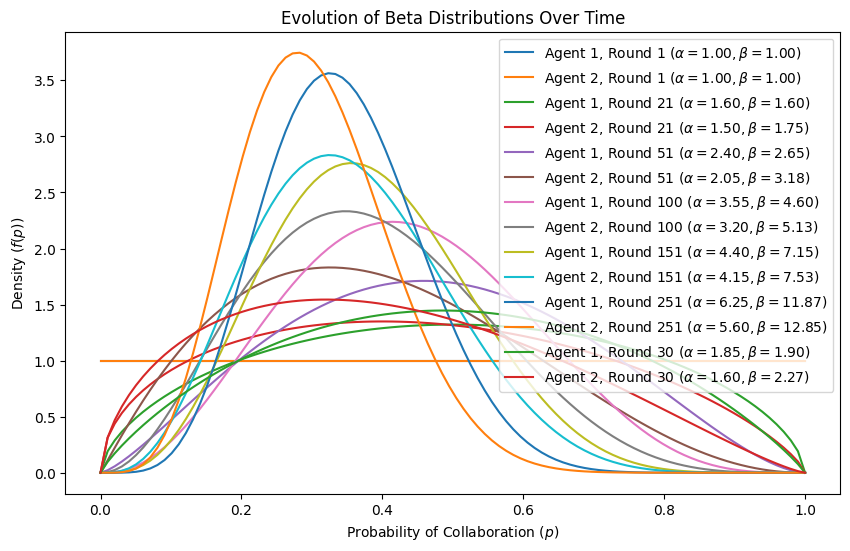

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Set random seed for reproducibility
np.random.seed(42)

# Simulation Parameters
num_agents = 2  
num_rounds = 300  
alpha_growth = 0.05  
beta_growth = 0.075   
# Initialize Beta distribution parameters (initial beliefs about collaboration probability)
alpha_values = [np.ones(num_agents)]
beta_values = [np.ones(num_agents)]  

# History for visualization
history = {
    "actions": [[] for _ in range(num_agents)],
    "beliefs": [[] for _ in range(num_agents)]
}

# Function to determine action based on expected probability
def choose_action(expected_p):
    return int(np.random.rand() < expected_p)  

# Run simulation
for _ in range(num_rounds):
    current_alpha = alpha_values[-1].copy()  
    current_beta = beta_values[-1].copy() 
    
    expected_p = current_alpha / (current_alpha + current_beta) 
    
    actions = [choose_action(expected_p[i]) for i in range(num_agents)]  
    
    for i in range(num_agents):
        # Update Beta distribution based on observed action
        if actions[i] == 1:  # Stag chosen
            current_alpha[i] += alpha_growth  # Increase belief in collaboration (slow)
        else:  # Hare chosen
            current_beta[i] += beta_growth  # Increase belief in defection (fast)

        history["actions"][i].append(actions[i])
        history["beliefs"][i].append(expected_p[i])
    
    alpha_values.append(current_alpha)
    beta_values.append(current_beta)

alpha_values = np.array(alpha_values)
beta_values = np.array(beta_values)

# Generate Beta distributions at different simulation time steps
time_steps = [0, 20, 50, 99, 150, 250, 29] 

plt.figure(figsize=(10, 6))

# Define probability range
p = np.linspace(0, 1, 100)

# Iterate through selected time steps and plot distributions
for t in time_steps:
    for i in range(num_agents):
        alpha_t = alpha_values[t, i]  # Alpha at current time step
        beta_t = beta_values[t, i]  

        plt.plot(p, beta.pdf(p, alpha_t, beta_t), 
                 label=f"Agent {i+1}, Round {t+1} ($\\alpha={alpha_t:.2f}, \\beta={beta_t:.2f}$)")

# Formatting the plot
plt.xlabel("Probability of Collaboration ($p$)")
plt.ylabel("Density ($f(p)$)")
plt.title("Evolution of Beta Distributions Over Time")
plt.legend()
plt.show()

C:\Users\mzarreh\AppData\Local\Temp\ipykernel_35148\1756291630.py:3: RuntimeWarning: invalid value encountered in divide
  signal_values = (alpha_values - 1) / (alpha_values + beta_values - 2)  # Derived from x = (alpha - 1) / (alpha + beta - 2)


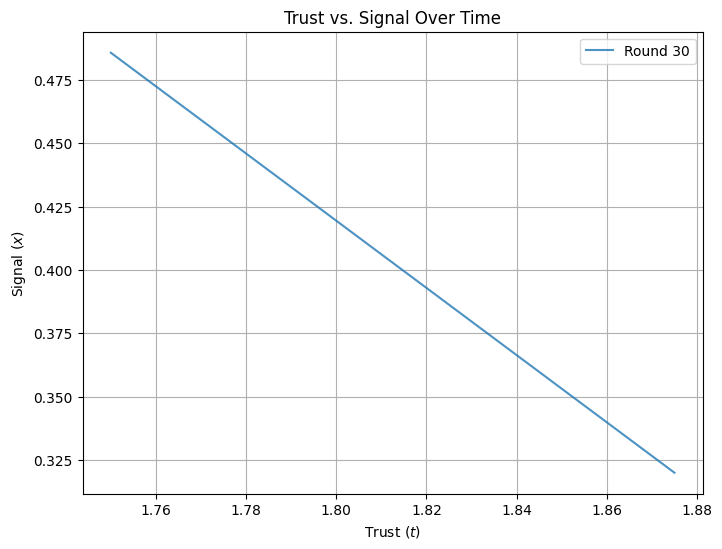

In [38]:
# Extract trust (t) and signal (x) from stored alpha and beta values
trust_values = alpha_values + beta_values - 2  # Derived from t = alpha + beta - 2
signal_values = (alpha_values - 1) / (alpha_values + beta_values - 2)  # Derived from x = (alpha - 1) / (alpha + beta - 2)

plt.figure(figsize=(8, 6))

# Plot Trust vs. Signal 

plt.plot(trust_values[t, :], signal_values[t, :], label=f"Round {t+1}", alpha=0.8)

# Formatting the plot
plt.xlabel("Trust ($t$)")
plt.ylabel("Signal ($x$)")
plt.title("Trust vs. Signal Over Time")
plt.legend()
plt.grid(True)
plt.show()


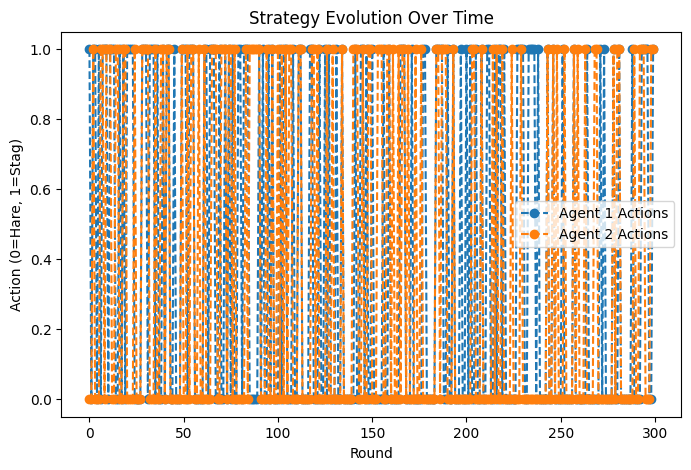

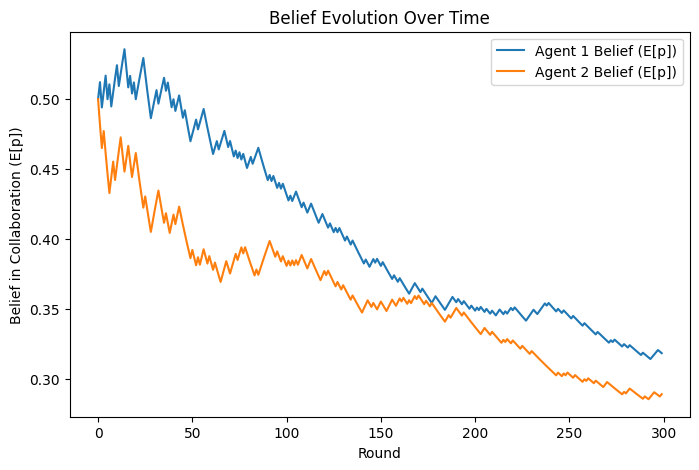

In [39]:
# Plot Action Evolution

plt.figure(figsize=(8, 5))
for i in range(num_agents):

    plt.plot(range(num_rounds), history["actions"][i], linestyle="--", marker="o", label=f"Agent {i+1} Actions")
plt.xlabel("Round")
plt.ylabel("Action (0=Hare, 1=Stag)")
plt.title("Strategy Evolution Over Time")
plt.legend()
plt.show()

# Plot Belief Evolution
plt.figure(figsize=(8, 5))
for i in range(num_agents):
    plt.plot(range(num_rounds), history["beliefs"][i], label=f"Agent {i+1} Belief (E[p])")
    
plt.xlabel("Round")
plt.ylabel("Belief in Collaboration (E[p])")
plt.title("Belief Evolution Over Time")
plt.legend()
plt.show()